<a href="https://colab.research.google.com/github/caiobaptistaa/Credit-Risk/blob/main/Neural_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

pd.pandas.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

X_train = pd.read_csv("/content/drive/MyDrive/X_train.csv", low_memory= False)
X_val = pd.read_csv("/content/drive/MyDrive/X_val.csv", low_memory= False)
X_test = pd.read_csv("/content/drive/MyDrive/X_test.csv", low_memory= False)
y_train = pd.read_csv("/content/drive/MyDrive/y_train.csv", low_memory= False)
y_val = pd.read_csv("/content/drive/MyDrive/y_val.csv", low_memory= False)
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Filter Methods for Feature Selection #


### Target (binary) - Numerical Variables ###

In [3]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001


In [4]:
num_vars = ["Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementGross", "GrAppv", "SBA_Appv"]

In [5]:
X_train[num_vars].head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv
0,0.210896,0.0003,0.000000,0.000000,0.653261,0.581875,0.603981
1,0.147627,0.0003,0.000000,0.000000,0.732654,0.685767,0.697948
2,0.253076,0.0001,0.000000,0.000000,0.723292,0.673772,0.692636
3,0.063269,0.0001,0.000341,0.000105,0.642065,0.566814,0.526240
4,0.210896,0.0025,0.000000,0.000000,0.924013,0.917606,0.910001


In [6]:
y_train.head()

,MIS_Status_P I F
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [7]:
from scipy.stats import pointbiserialr

lista = []
for cols in num_vars:
    corr_matrix = pointbiserialr(y_train["MIS_Status_P I F"], X_train[cols])
    lista.append(corr_matrix)
print(lista)

[PointbiserialrResult(correlation=0.3143520583042729, pvalue=0.0), PointbiserialrResult(correlation=0.02874172777318287, pvalue=3.899183997814628e-115), PointbiserialrResult(correlation=-0.010482494129798174, pvalue=9.055066659015331e-17), PointbiserialrResult(correlation=-0.010989227343955469, pvalue=2.816200748708575e-18), PointbiserialrResult(correlation=0.15013313555029964, pvalue=0.0), PointbiserialrResult(correlation=0.18295882360317528, pvalue=0.0), PointbiserialrResult(correlation=0.197734419586471, pvalue=0.0)]


In [8]:
from tabulate import tabulate
A = np.array(lista)
A_df = pd.DataFrame(A)
A_df = A_df.rename(columns = {0 : "Correlation", 1: "P-value"})
vari = {"Variáveis": ["Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementGross", "GrAppv", "SBA_Appv"]}

var_df = pd.DataFrame(vari)
A_df = pd.merge(var_df, A_df, left_index= True, right_index = True)

print(tabulate(A_df, headers = "keys", tablefmt = "psql"))

+----+-------------------+---------------+--------------+
|    | Variáveis         |   Correlation |      P-value |
|----+-------------------+---------------+--------------|
|  0 | Term              |     0.314352  | 0            |
|  1 | NoEmp             |     0.0287417 | 3.89918e-115 |
|  2 | CreateJob         |    -0.0104825 | 9.05507e-17  |
|  3 | RetainedJob       |    -0.0109892 | 2.8162e-18   |
|  4 | DisbursementGross |     0.150133  | 0            |
|  5 | GrAppv            |     0.182959  | 0            |
|  6 | SBA_Appv          |     0.197734  | 0            |
+----+-------------------+---------------+--------------+


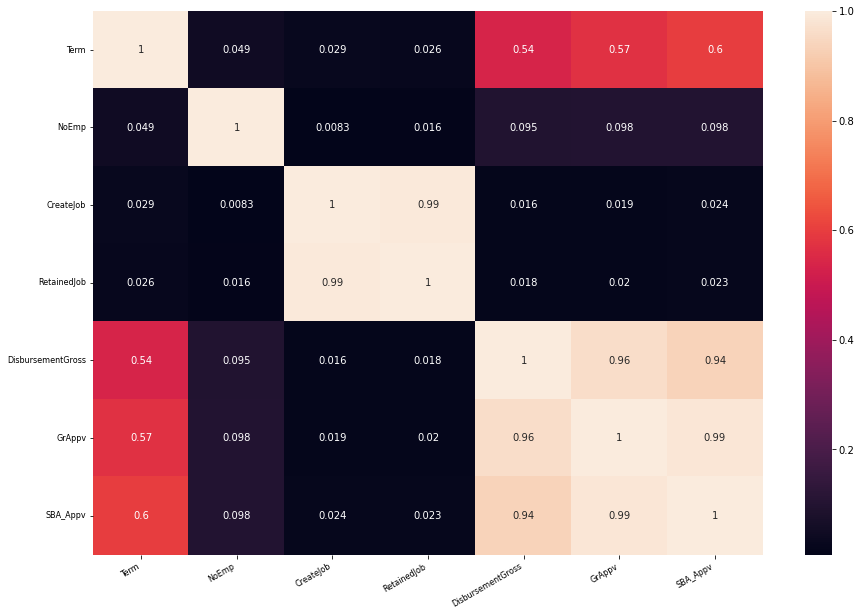

In [9]:
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = X_train[num_vars].corr(method = "pearson")
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_train[["DisbursementGross", "SBA_Appv", "GrAppv"]])
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2
0,0.128647,0.032169,-0.014173
1,-0.031855,0.021441,-0.007063
2,-0.016812,0.025938,-0.010697
3,0.193183,-0.002392,0.018018
4,-0.397987,-0.012939,0.002925


In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_train[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_train[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

X_val[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_val[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

X_test[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_test[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

In [12]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981,0.128647,0.032169,-0.014173
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948,-0.031855,0.021441,-0.007063
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636,-0.016812,0.025938,-0.010697
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240,0.193183,-0.002392,0.018018
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001,-0.397987,-0.012939,0.002925


In [13]:
X_val.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.395217,0.033385,1.000000,0.120037,0.120739,0.666667,0.031634,0.0003,0.0,0.000000,0.000316,0.5,0.0,1.0,0.588999,0.493965,0.457241,0.306449,0.001207,0.013824
1,1.0,0.168342,1.000000,0.052230,0.448678,1.000000,0.333333,0.421793,0.0005,0.0,0.000000,0.000000,0.0,0.0,1.0,0.685650,0.624861,0.645374,0.060722,0.029675,-0.012204
2,1.0,0.040894,1.000000,0.027879,0.868521,0.329610,0.666667,0.147627,0.0003,0.0,0.000114,0.000316,0.5,0.5,1.0,0.489045,0.349625,0.376718,0.492438,0.035702,-0.025251
3,1.0,0.092111,1.000000,1.000000,0.042767,0.392264,0.333333,0.314587,0.0006,0.5,0.000000,0.000000,0.0,0.0,1.0,0.859259,0.841850,0.835777,-0.274260,-0.002492,0.002951
4,1.0,0.023090,0.042167,0.052224,1.000000,0.055979,0.666667,0.147627,0.0010,0.0,0.000000,0.001053,0.5,1.0,1.0,0.642065,0.566814,0.526240,0.193077,-0.002425,0.018025


In [14]:
X_test.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.506926,0.039995,1.000000,1.000000,1.000000,0.333333,0.316344,0.006001,0.0,0.000000,0.000000,0.0,0.5,1.0,1.050353,1.058389,0.942942,-0.562588,-0.095573,0.055114
1,1.0,0.506926,0.039995,0.109917,0.329846,1.000000,0.333333,0.316344,0.000100,0.5,0.000000,0.000000,0.0,0.0,1.0,0.737009,0.691325,0.709640,-0.044277,0.024647,-0.010080
2,1.0,0.017379,1.000000,0.159064,0.553261,0.297904,0.333333,0.210896,0.001800,0.0,0.000000,0.000000,0.0,0.0,1.0,0.777996,0.742951,0.753417,-0.122851,0.016444,-0.005572
3,1.0,0.013769,0.005939,0.109917,0.329846,0.392264,0.666667,0.147627,0.002000,0.0,0.000227,0.002316,1.0,1.0,1.0,0.838255,0.667270,0.622018,-0.018936,-0.108826,-0.017126
4,1.0,0.263698,0.016340,1.000000,0.035710,0.172908,0.666667,0.147627,0.000100,0.5,0.000000,0.000105,0.5,0.5,1.0,0.672181,0.607088,0.622018,0.093453,0.027250,-0.009726


In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.97872305, 0.0181337 , 0.00314325])

### Target (binary) - Numerical Variables ###

In [16]:
num_vars = ["Term", "NoEmp", "CreateJob", "RetainedJob", "PC1"]

In [17]:
X_train[num_vars].head()

,Term,NoEmp,CreateJob,RetainedJob,PC1
0,0.210896,0.0003,0.000000,0.000000,0.128647
1,0.147627,0.0003,0.000000,0.000000,-0.031855
2,0.253076,0.0001,0.000000,0.000000,-0.016812
3,0.063269,0.0001,0.000341,0.000105,0.193183
4,0.210896,0.0025,0.000000,0.000000,-0.397987


In [18]:
X_train[num_vars].head()

,Term,NoEmp,CreateJob,RetainedJob,PC1
0,0.210896,0.0003,0.000000,0.000000,0.128647
1,0.147627,0.0003,0.000000,0.000000,-0.031855
2,0.253076,0.0001,0.000000,0.000000,-0.016812
3,0.063269,0.0001,0.000341,0.000105,0.193183
4,0.210896,0.0025,0.000000,0.000000,-0.397987


In [19]:
from scipy.stats import pointbiserialr

lista = []
for cols in num_vars:
    corr_matrix = pointbiserialr(y_train["MIS_Status_P I F"], X_train[cols])
    lista.append(corr_matrix)
print(lista)

[PointbiserialrResult(correlation=0.3143520583042729, pvalue=0.0), PointbiserialrResult(correlation=0.02874172777318287, pvalue=3.899183997814628e-115), PointbiserialrResult(correlation=-0.010482494129798174, pvalue=9.055066659015331e-17), PointbiserialrResult(correlation=-0.010989227343955469, pvalue=2.816200748708575e-18), PointbiserialrResult(correlation=-0.18415921262503931, pvalue=0.0)]


In [20]:
from tabulate import tabulate
A = np.array(lista)
A_df = pd.DataFrame(A)
A_df = A_df.rename(columns = {0 : "Correlation", 1: "P-value"})
vari = {"Variáveis": ["Term", "NoEmp", "CreateJob", "RetainedJob", "PC_DGS"]}

var_df = pd.DataFrame(vari)
A_df = pd.merge(var_df, A_df, left_index= True, right_index = True)

print(tabulate(A_df, headers = "keys", tablefmt = "psql"))

+----+-------------+---------------+--------------+
|    | Variáveis   |   Correlation |      P-value |
|----+-------------+---------------+--------------|
|  0 | Term        |     0.314352  | 0            |
|  1 | NoEmp       |     0.0287417 | 3.89918e-115 |
|  2 | CreateJob   |    -0.0104825 | 9.05507e-17  |
|  3 | RetainedJob |    -0.0109892 | 2.8162e-18   |
|  4 | PC_DGS      |    -0.184159  | 0            |
+----+-------------+---------------+--------------+


### Target (Binary) - Categorical Variables ###

In [21]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981,0.128647,0.032169,-0.014173
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948,-0.031855,0.021441,-0.007063
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636,-0.016812,0.025938,-0.010697
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240,0.193183,-0.002392,0.018018
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001,-0.397987,-0.012939,0.002925


In [22]:
from sklearn.feature_selection import chi2

In [23]:
cat_vars = ["City", "State", "Zip", "Bank", "BankState", "NAICS", "ApprovalFY", "NewExist", "UrbanRural", "RevLineCr", "LowDoc"]

In [24]:
scores = chi2(X_train[cat_vars], y_train)
scores

(array([1.41795770e+01, 1.64443145e+00, 9.49762376e+02, 5.14772601e+03,
        2.87826669e-01, 2.71015736e+03, 9.84569044e+02, 7.32574489e+01,
        4.34392193e+03, 2.79799180e+03, 5.48894827e+02]),
 array([1.66164296e-004, 1.99718538e-001, 1.49415957e-208, 0.00000000e+000,
        5.91616629e-001, 0.00000000e+000, 4.05906156e-216, 1.13794899e-017,
        0.00000000e+000, 0.00000000e+000, 2.18983046e-121]))

In [25]:
p_value = pd.Series(scores[1],index=X_train[cat_vars].columns)
p_value.sort_values(ascending=True,inplace=True)

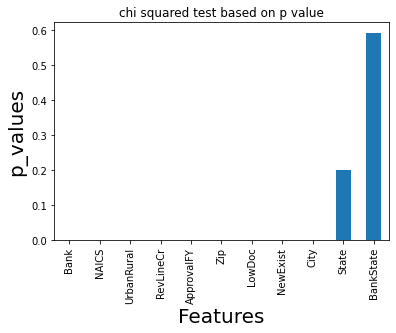

In [26]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test based on p value")
plt.show()

## Dropping Variables with Low Significance ##

In [27]:
X_train = X_train.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1)
X_val = X_val.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1 )
X_test = X_test.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1 )

In [28]:
X_train.head()

,City,Zip,Bank,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,PC1
0,1.0,1.00000,1.000000,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.128647
1,1.0,0.01977,1.000000,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,-0.031855
2,1.0,1.00000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,-0.016812
3,1.0,1.00000,1.000000,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.193183
4,1.0,0.02869,0.109917,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,-0.397987


# Neural Network #

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

neural = MLPClassifier()

parameters = {'hidden_layer_sizes': [50, 100, 150], 'activation': ['relu', 'logistic'],
              'solver': ['adam']}

gscv = GridSearchCV(estimator = neural, param_grid = parameters, scoring = 'accuracy')

gscv.fit(X_val, y_val.values.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [50, 100, 150],
                         'solver': ['adam']},
             scoring='accuracy')

In [31]:
pd.DataFrame(gscv.cv_results_)[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'activation': 'relu', 'hidden_layer_sizes': 5...",0.879340
1,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.882714
2,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.883500
3,"{'activation': 'logistic', 'hidden_layer_sizes...",0.868738
4,"{'activation': 'logistic', 'hidden_layer_sizes...",0.868693
5,"{'activation': 'logistic', 'hidden_layer_sizes...",0.868226


In [37]:
best_estim = gscv.best_estimator_
best_param = gscv.best_params_

In [39]:
print(best_estim), print(best_param)

MLPClassifier(hidden_layer_sizes=150)
{'activation': 'relu', 'hidden_layer_sizes': 150, 'solver': 'adam'}


(None, None)

In [40]:
neural_net = MLPClassifier(hidden_layer_sizes= 150, activation = 'relu', solver = 'adam')
neural_net.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=150)

In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

In [42]:
y_pred_train = neural_net.predict(X_train)
y_pred_val = neural_net.predict(X_val)

y_prob_train = neural_net.predict_proba(X_train)
y_prob_val = neural_net.predict_proba(X_val)

In [44]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

logloss_train = log_loss(y_train, y_prob_train)
logloss_val = log_loss(y_val, y_prob_val)

f1_train = f1_score(y_train, y_pred_train)
f1_val = f1_score(y_val, y_pred_val)

auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)

In [45]:
from tabulate import tabulate

tablefinish = [["Accuracy", accuracy_train, accuracy_val],
        ["Log_loss", logloss_train, logloss_val], 
        ["F1", f1_train, f1_val], ["AUC", auc_train, auc_val]]

head = ["Train", "Validation"]

print(tabulate(tablefinish, headers = head, tablefmt = "grid"))

+----------+----------+--------------+
|          |    Train |   Validation |
+==========+==========+==============+
| Accuracy | 0.900917 |     0.898239 |
+----------+----------+--------------+
| Log_loss | 0.245616 |     0.251014 |
+----------+----------+--------------+
| F1       | 0.940601 |     0.938954 |
+----------+----------+--------------+
| AUC      | 0.807361 |     0.80322  |
+----------+----------+--------------+
